In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('runthrough/raw_data/master_loan_tape.csv')

date_cols = [c for c in df.columns.to_list() if 'Dt' in c]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df

,GP,Note_Yr,Note_Mth,NoteDt,LoanAmt,MaturityDt,MaturityMthsQty,PrepayDt,PrepayMthsQty,DefaultDt,DefaultMthsQty,PP_qty,MatBucket,Code,CodeText,Margin,MarginBucket,state_abbreviation,state_name
0,1502649,2000,7,2000-07-31,20600.00,2007-07-31,84,2008-10-08,NaN,2006-03-06,67.0,67.0,0-8,453110.0,Florists,0.0400,0.0275+,CT,Connecticut
1,1503079,2001,1,2001-01-31,14288.55,2008-01-31,84,2010-11-30,NaN,2004-03-02,37.0,37.0,0-8,-1.0,NaN,0.0275,0.025 - 0.0275,OH,Ohio
2,2019667,2001,2,2001-02-28,3600.00,2003-02-28,24,2002-01-30,11.0,NaT,NaN,11.0,0-8,441310.0,Automotive Parts and Accessories Stores,NaN,NaN,MS,Mississippi
3,2022516,2001,2,2001-02-28,60000.00,2011-02-27,119,2011-09-13,NaN,2010-01-12,106.0,106.0,8-11,722212.0,"Cafeterias, Grill Buffets, and Buffets",0.0150,0.0125 - 0.015,NY,New York
4,2039790,2001,7,2001-07-31,20000.02,2006-07-31,60,2005-05-12,45.0,2003-12-31,29.0,29.0,0-8,561499.0,All Other Business Support Services,NaN,NaN,NC,North Carolina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820495,18027786,2022,8,2022-08-22,2329540.00,2047-08-22,300,NaT,NaN,NaT,NaN,NaN,21+,811192.0,"Automotive Repair, Services, And Parking",0.0200,0.0175 - 0.02,OH,Ohio
820496,18028014,2022,8,2022-08-26,35000.00,2032-08-12,119,NaT,NaN,NaT,NaN,NaN,8-11,NaN,NaN,0.0375,0.0275+,NY,New York
820497,18029633,2022,9,2022-09-23,NaN,2034-09-22,143,NaT,NaN,NaT,NaN,NaN,11-16,NaN,NaN,0.0150,0.0125 - 0.015,CA,California
820498,18031120,2022,9,2022-09-21,NaN,2032-09-16,119,NaT,NaN,NaT,NaN,NaN,8-11,524210.0,"Insurance Agents, Brokers, And Service",0.0000,NaN,CO,Colorado


In [2]:
df[(df['MatBucket']=='21+')|(df['MatBucket']=='8-11')][['LoanAmt']].mean()

LoanAmt    609452.396416
dtype: float64

In [3]:
df = df.sort_values(by=['Note_Yr','Note_Mth'])
df = df[df['Note_Yr']<=2022]
yr_mth = df[df['Note_Yr']<=2022][['Note_Yr','Note_Mth']].drop_duplicates()


user_df = df[df['MatBucket']=='21+']

In [4]:
test = user_df[['GP','NoteDt','Note_Yr','Note_Mth','PrepayDt','DefaultDt','PP_qty']].copy()

test['NoteDt'] = pd.to_datetime(test['NoteDt'])
test['stop_counting_date'] = test[['DefaultDt','PrepayDt']].min(axis=1)
test = test[['GP','NoteDt','Note_Yr','Note_Mth','PP_qty','stop_counting_date']].reset_index().drop(columns='index')
test


,GP,NoteDt,Note_Yr,Note_Mth,PP_qty,stop_counting_date
0,1477340,2000-01-31,2000,1,7.0,2000-09-22
1,1472083,2000-01-31,2000,1,10.0,2000-12-19
2,826902,2000-01-31,2000,1,43.0,2003-08-31
3,1478651,2000-01-31,2000,1,9.0,2000-11-30
4,1481972,2000-01-31,2000,1,99.0,2008-05-14
...,...,...,...,...,...,...
124801,18029742,2022-10-05,2022,10,NaN,NaT
124802,18027214,2022-10-07,2022,10,NaN,NaT
124803,18032979,2022-10-03,2022,10,NaN,NaT
124804,18026608,2022-10-01,2022,10,NaN,NaT


In [5]:
yr_mth = yr_mth.reset_index().drop(columns='index')
yr_mth

,Note_Yr,Note_Mth
0,2000,1
1,2000,2
2,2000,3
3,2000,4
4,2000,5
...,...,...
271,2022,8
272,2022,9
273,2022,10
274,2022,11


In [6]:
min_origination = test['NoteDt'].min().to_period('M')
max_stop_counting = test['stop_counting_date'].max().to_period('M')
monthly_intervals = pd.period_range(start=min_origination, end=max_stop_counting, freq='M')

In [7]:
outstanding_loans = pd.DataFrame(index=monthly_intervals)

outstanding_loans

""
2000-01
2000-02
2000-03
2000-04
2000-05
...
2022-05
2022-06
2022-07
2022-08


In [8]:
def calculate_loan_age(note_date, end_date):
    age_in_days = (end_date - note_date).dt.days
    age_in_months = (age_in_days // 30).astype(int)
    return age_in_months


age_bins = [0, 12, 24, 36, 48, np.inf]
age_labels = ['0-12', '13-24', '25-36', '37-48', '48+']

for interval in monthly_intervals:
    mask = (test['NoteDt'] <= interval.end_time) & (test['stop_counting_date'].isnull() | (test['stop_counting_date'] > interval.start_time))
    loans_in_interval = test.loc[mask]

    # Calculate loan ages in months using the custom function
    loans_in_interval['LoanAge'] = calculate_loan_age(loans_in_interval['NoteDt'], interval.end_time)

    # Bin loans based on LoanAge and count
    loan_counts = loans_in_interval.groupby(pd.cut(loans_in_interval['LoanAge'], bins=age_bins, labels=age_labels, right=False)).size()

    # Update outstanding loans dataframe
    for label, count in loan_counts.items():
        outstanding_loans.loc[interval, label] = count

        


In [9]:
outstanding_loans

,0-12,13-24,25-36,37-48,48+
2000-01,443.0,0.0,0.0,0.0,0.0
2000-02,772.0,0.0,0.0,0.0,0.0
2000-03,1226.0,0.0,0.0,0.0,0.0
2000-04,1644.0,0.0,0.0,0.0,0.0
2000-05,2120.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2022-05,10247.0,7829.0,4787.0,5126.0,25039.0
2022-06,9994.0,8400.0,4722.0,4994.0,24985.0
2022-07,9387.0,9195.0,4609.0,4934.0,24841.0
2022-08,8737.0,9842.0,4691.0,4788.0,24761.0


In [10]:
prepayment_counts = pd.DataFrame(index=monthly_intervals, columns=age_labels, dtype=int)

for interval in monthly_intervals:
    # Create a mask to filter loans within the current interval
    mask = (test['NoteDt'] <= interval.end_time) & ((test['stop_counting_date'] <= interval.end_time) & (test['stop_counting_date'] >= interval.start_time))

    # Select loans within the interval
    loans_in_interval = test.loc[mask]

    # Calculate loan ages in months using the updated `calculate_loan_age` function
    loans_in_interval['LoanAge'] = calculate_loan_age(loans_in_interval['NoteDt'], interval.end_time)

    # Bin loans based on LoanAge and count the prepayments
    prepayment_counts.loc[interval, :] = loans_in_interval.groupby(pd.cut(loans_in_interval['LoanAge'], bins=age_bins, labels=age_labels, right=False))['PP_qty'].count()



In [11]:
smms = prepayment_counts / (prepayment_counts+outstanding_loans)

cprs = (1-(1-smms)**12)*100

In [12]:
cprs

,0-12,13-24,25-36,37-48,48+
2000-01,0.000000,NaN,NaN,NaN,NaN
2000-02,0.000000,NaN,NaN,NaN,NaN
2000-03,0.000000,NaN,NaN,NaN,NaN
2000-04,0.000000,NaN,NaN,NaN,NaN
2000-05,0.564306,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-05,2.084062,8.336963,11.941606,19.961155,20.824675
2022-06,1.074349,5.002412,14.275054,21.172969,22.704376
2022-07,1.269556,5.321912,12.370669,25.228547,21.566983
2022-08,1.902978,5.096934,13.053443,23.107829,19.013679


In [117]:
# cprs.to_csv('21+_historical_cpr.csv')

In [13]:
outstanding_loans.head(25)

,0-12,13-24,25-36,37-48,48+
2000-01,443.0,0.0,0.0,0.0,0.0
2000-02,772.0,0.0,0.0,0.0,0.0
2000-03,1226.0,0.0,0.0,0.0,0.0
2000-04,1644.0,0.0,0.0,0.0,0.0
2000-05,2120.0,0.0,0.0,0.0,0.0
2000-06,2621.0,0.0,0.0,0.0,0.0
2000-07,2993.0,0.0,0.0,0.0,0.0
2000-08,3444.0,0.0,0.0,0.0,0.0
2000-09,3827.0,0.0,0.0,0.0,0.0
2000-10,4201.0,0.0,0.0,0.0,0.0


In [14]:
test

,GP,NoteDt,Note_Yr,Note_Mth,PP_qty,stop_counting_date
0,1477340,2000-01-31,2000,1,7.0,2000-09-22
1,1472083,2000-01-31,2000,1,10.0,2000-12-19
2,826902,2000-01-31,2000,1,43.0,2003-08-31
3,1478651,2000-01-31,2000,1,9.0,2000-11-30
4,1481972,2000-01-31,2000,1,99.0,2008-05-14
...,...,...,...,...,...,...
124801,18029742,2022-10-05,2022,10,NaN,NaT
124802,18027214,2022-10-07,2022,10,NaN,NaT
124803,18032979,2022-10-03,2022,10,NaN,NaT
124804,18026608,2022-10-01,2022,10,NaN,NaT


<Axes: title={'center': 'Distribution of MoB for 2018 Cohort'}, ylabel='Frequency'>

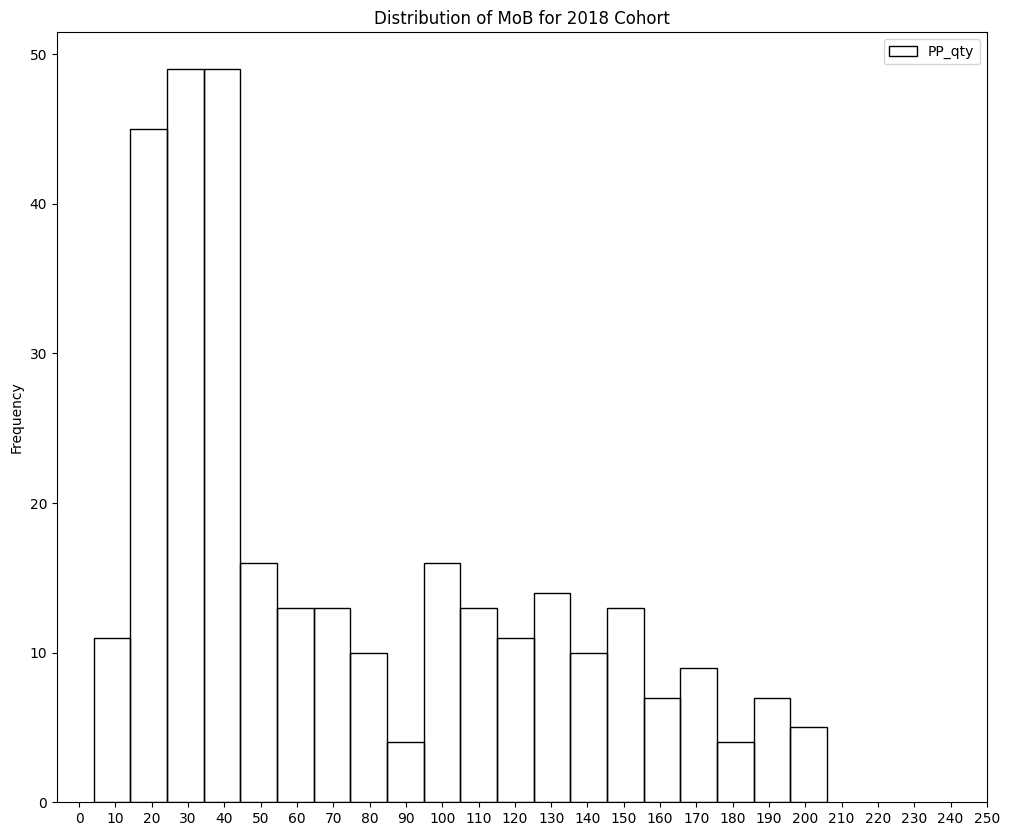

In [22]:
test[(test['Note_Yr']==2005) & (test['Note_Mth']==1)].sort_values('PP_qty')[['PP_qty']].plot(kind='hist',bins=20,fill=False,xticks=list(range(0,251,10)),figsize=(12,10), title='Distribution of MoB for 2018 Cohort')

In [174]:
revl = pd.read_csv('revl_loantape.csv')
cols = revl.columns.to_list()
cols = [c.replace('\n', ' ') for c in cols]
revl.columns = cols
cols
pmt_cols = [c for c in cols if '20' in c]




In [175]:
test = revl[revl['GP#'].duplicated(keep=False)].sort_values('GP#')
test = test[['GP#']+pmt_cols].set_index('GP#').transpose()

import numpy as np
from itertools import zip_longest

def figure_out_balance_history(in_elem:tuple)->list:
    print(in_elem)
    print([x if not pd.isna(x) else y for x, y in zip_longest(in_elem[0][0], in_elem[0][1])])

def flatten(in_arr:list)->list:
    return [item for sublist in in_arr for item in sublist]

duplicate_gps = test.columns.to_list()
date_index = test.index.to_list()
data = {}
for idx, c in enumerate(duplicate_gps):
    if idx > 0:
        balances = test[duplicate_gps[idx-1]].values
        filled_balances = np.where(np.isnan(balances), np.roll(balances, 1, axis=1), balances)
        zeros_count = np.count_nonzero(filled_balances == 0, axis=0)

        index_with_less_zeros = int(zeros_count[1] < zeros_count[0])
        
        
        data[c] = (filled_balances[:, index_with_less_zeros])
        
        
x = pd.DataFrame(data).transpose()
x.columns = date_index


In [176]:
to_fix = x.index.to_list()
revl = revl.sort_values('GP#')
x = x.sort_index().reset_index().rename(columns={'index':'GP#'})

x


,GP#,4/30/2021,5/30/2021,6/30/2021,7/31/2021,8/30/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,1003587004,0.00,0.00,744893.83,743841.17,742050.63,740060.20,734235.44,732886.00,731054.00,...,712895.09,712895.09,712895.09,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16
1,1010478806,0.00,0.00,0.00,0.00,0.00,0.00,988154.50,986546.43,980902.10,...,966709.06,963883.16,963883.16,963122.01,948791.88,948791.88,947587.36,945056.48,615656.48,346243.72
2,1010659100,0.00,0.00,0.00,0.00,0.00,0.00,1656900.00,1654719.88,1650875.76,...,1625905.46,1623685.85,1622197.92,1619766.36,1617674.37,1616541.66,1612116.06,1612116.06,1612116.06,1609488.52
3,1011169108,0.00,0.00,0.00,0.00,0.00,0.00,3732543.50,3726125.87,3716470.75,...,3661124.79,3654980.25,3648828.66,3645937.08,3640552.34,3636111.90,3634078.14,3634078.14,3631929.20,3630169.31
4,1012799100,0.00,0.00,0.00,0.00,0.00,0.00,569105.88,569105.88,567327.59,...,558586.82,557822.48,557309.65,556472.61,555752.23,555360.78,554601.04,553835.71,553835.71,552923.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,9974249009,0.00,0.00,0.00,0.00,0.00,0.00,195371.78,194115.67,192181.13,...,180689.96,179508.26,178245.52,177170.34,175880.59,174729.40,172403.43,172403.43,171235.24,170073.67
3795,9976039009,0.00,0.00,0.00,0.00,0.00,0.00,330930.00,330067.88,329577.51,...,324851.42,324440.93,323965.77,323647.74,323252.04,322928.86,322674.38,322159.20,321898.34,321572.73
3796,9976817407,433198.39,430576.43,428652.80,426507.66,424428.02,422477.67,420378.16,418268.29,416216.77,...,397521.76,395817.83,394216.92,392533.46,390934.76,389311.11,387650.15,0.00,0.00,0.00
3797,9986179009,0.00,0.00,0.00,0.00,0.00,0.00,196580.94,196231.31,195907.13,...,191491.87,190884.01,190187.48,189326.34,188501.23,187759.77,186974.15,185960.89,185081.83,184045.02


In [183]:
# Drop duplicates, keep rows with NAICS code 
y = revl[revl['GP#'].duplicated(keep=False)]
print(y.shape)
y = y[y['SIC / NAICS'].notna()]

y.set_index('GP#').merge(x.set_index('GP#'), left_index=True,right_index=True)


(7598, 47)


,Legacy Mapping,Deal,Borrower Name,City,State,SIC / NAICS,ADJ,Accrual,Note Date,Year,...,9/30/2022_y,10/31/2022_y,11/30/2022_y,12/31/2022_y,1/31/2023_y,2/28/2023_y,3/31/2023_y,4/30/2023_y,5/31/2023_y,6/30/2023_y
GP#,,,,,,,,,,,,,,,,,,,,,
1003587004,2021-1,2017-1/2021-1A,Fall Creek Car Wash,Rosenberg,TX,811192,Q,ACT/365,10/18/2017,2017,...,712895.09,712895.09,712895.09,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16
1003587004,2021-1,REVL 2022-1,Fall Creek Car Wash,Rosenberg,TX,811192,Q,ACT/365,10/18/2017,2017,...,712895.09,712895.09,712895.09,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16
1010478806,REVL 2021-2,REVL 2023-1,"Kapp Associates, Corporation",South River,NJ,445310,Q,ACT/365,4/14/2021,2021,...,966709.06,963883.16,963883.16,963122.01,948791.88,948791.88,947587.36,945056.48,615656.48,346243.72
1010659100,REVL 2021-2,REVL 2023-1,KEDARESHWAR LLC,HOUSTON,TX,721110,Q,ACT/365,6/29/2021,2021,...,1625905.46,1623685.85,1622197.92,1619766.36,1617674.37,1616541.66,1612116.06,1612116.06,1612116.06,1609488.52
1011169108,REVL 2021-2,REVL 2023-1,Peacock Group LLC & Hollywood Management LLC,Farmingdale,NY,721110,Q,ACT/365,6/28/2021,2021,...,3661124.79,3654980.25,3648828.66,3645937.08,3640552.34,3636111.90,3634078.14,3634078.14,3631929.20,3630169.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976039009,REVL 2021-2,REVL 2023-1,Velocity Motors LLC,Mooresville,NC,811192,Q,ACT/365,6/16/2021,2021,...,324851.42,324440.93,323965.77,323647.74,323252.04,322928.86,322674.38,322159.20,321898.34,321572.73
9976817407,REVL 2021-1,REVL 2023-1,Total Corner Inc.,Newbern,TN,445310,Q,0,5/28/2020,2020,...,397521.76,395817.83,394216.92,392533.46,390934.76,389311.11,387650.15,0.00,0.00,0.00
9976817407,NaN,REVL 2021-1,Total Corner Inc.,Newbern,TN,445310,Q,ACT/365,5/28/2020,2020,...,397521.76,395817.83,394216.92,392533.46,390934.76,389311.11,387650.15,0.00,0.00,0.00


In [57]:
old = ['2018-2','2019-2','2017-1/2021-1A','2019-1','REVL 2021-1','REVL 2021-2']
test = revl[~revl['Deal'].isin(old)]


In [27]:
revl[revl['GP#'].duplicated(keep=False)]

,Legacy Mapping,Deal,GP#,Borrower Name,City,State,SIC /\nNAICS,ADJ,Accrual,Note\n Date,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,Industry
0,NaN,REVL 2021-2,9991349006,AB Storm Operations,Madison Lake,MN,NaN,Q,ACT/365,6/15/2021,...,263468.10,263060.15,262655.10,262303.32,262045.38,0.00,0.00,0.00,0.00,Limited-Service Restaurants
1,REVL 2021-2,REVL 2023-1,9991349006,AB Storm Operations,Madison Lake,MN,722513,Q,ACT/365,6/15/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,261246.69,261103.79,260680.72,Limited-Service Restaurants
2,NaN,REVL 2021-2,9986179009,AAA Transportation of NC Inc,Raleigh,NC,NaN,Q,ACT/365,6/14/2021,...,190884.01,190187.48,189326.34,188501.23,187759.77,0.00,0.00,0.00,0.00,"General Freight Trucking, Local"
3,REVL 2021-2,REVL 2023-1,9986179009,AAA Transportation of NC Inc,Raleigh,NC,484110,Q,ACT/365,6/14/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,185960.89,185081.83,184045.02,"General Freight Trucking, Local"
4,NaN,REVL 2021-1,9976817407,Total Corner Inc.,Newbern,TN,445310,Q,ACT/365,5/28/2020,...,395817.83,394216.92,392533.46,390934.76,389311.11,0.00,0.00,0.00,0.00,"Beer, Wine, and Liquor Stores"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,REVL 2021-2,REVL 2023-1,1010659100,KEDARESHWAR LLC,HOUSTON,TX,721110,Q,ACT/365,6/29/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,1612116.06,1612116.06,1609488.52,Hotels (except Casino Hotels) and Motels
11997,NaN,REVL 2021-2,1010478806,"Kapp Associates, Corporation",South River,NJ,NaN,Q,ACT/365,4/14/2021,...,963883.16,963883.16,963122.01,948791.88,948791.88,0.00,0.00,0.00,0.00,"Beer, Wine, and Liquor Stores"
11998,REVL 2021-2,REVL 2023-1,1010478806,"Kapp Associates, Corporation",South River,NJ,445310,Q,ACT/365,4/14/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,945056.48,615656.48,346243.72,"Beer, Wine, and Liquor Stores"
11999,2021-1,REVL 2022-1,1003587004,Fall Creek Car Wash,Rosenberg,TX,811192,Q,ACT/365,10/18/2017,...,712895.09,712895.09,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16,Car Washes
